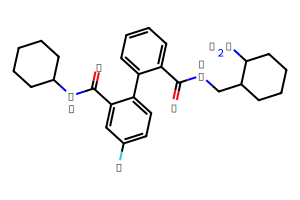

In [1]:
import emojichem
emojichem.emoji_draw("O=C(NCC1CCCCC1N)C2=CC=CC=C2C3=CC=C(F)C=C3C(=O)NC4CCCCC4")

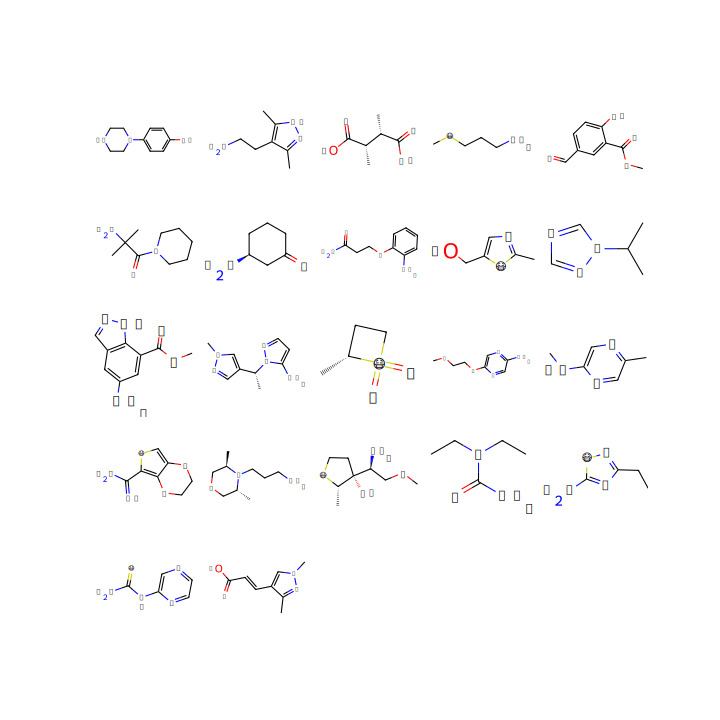

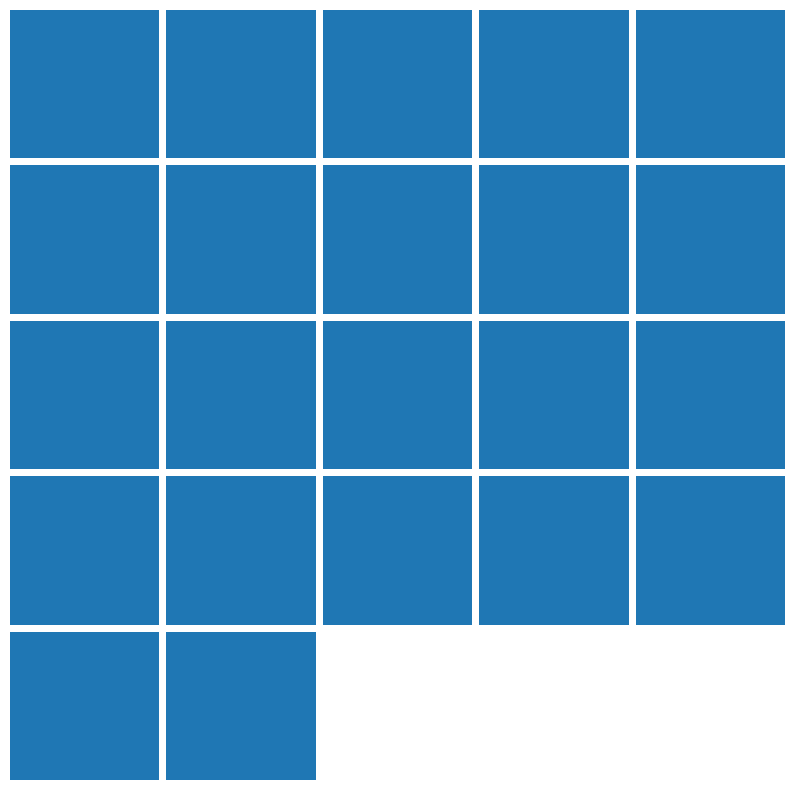

In [3]:
smiles ='''Oc1ccc(N2CCNCC2)cc1
Cc1n[nH]c(C)c1CCN
C[C@H](C(=O)O)[C@H](C)C(=O)O
CSCCCN
COC(=O)c1cc(C=O)ccc1O
CC(C)(N)C(=O)N1CCCCC1
N[C@H]1CCCC(=O)C1
NC(=O)CCOc1ccccc1N
Cc1ncc(CO)s1
CC(C)n1cncn1
COC(=O)c1cc(N)cc2cn[nH]c12
C[C@H](c1cnn(C)c1)n1nccc1N
C[C@@H]1CCS1(=O)=O
COCCOc1cnc(N)cn1
CNc1cnc(C)cn1
N=C(N)c1scc2c1OCCO2
C[C@@H]1COC[C@@H](C)N1CCCN
COC[C@H](N)[C@]1(O)CCS[C@H]1C
CCN(CC)C(N)=O
CCc1nsc(N)n1
NC(=S)Nc1cnccn1
Cc1nn(C)cc1/C=C/C(=O)O'''.split('\n')
emojichem.emoji_grid(smiles)

In [ ]:
from rdkit import Chem
import emojichem
from IPython.display import SVG, display

mol = Chem.MolFromSmiles("CCN(CC)C(=O)[C@H]1CN([C@@H]2Cc3c[nH]c4c3c(ccc4)C2=C1)C")


drawer = Chem.Draw.rdMolDraw2D.MolDraw2DSVG(300, 250)
drawer.drawOptions().bgColor = None
drawer.drawOptions().fixedFontSize = 14
drawer.DrawMolecule(mol)
drawer.FinishDrawing()
print(f"font size: {drawer.FontSize()}")
display(SVG(drawer.GetDrawingText()))

emojichem.emoji_draw("CCN(CC)C(=O)[C@H]1CN([C@@H]2Cc3c[nH]c4c3c(ccc4)C2=C1)C")

In [ ]:
!pip install mendeleev grapheme

In [ ]:
# getting indices printed in corct order
from mendeleev.fetch import fetch_table
import grapheme
import re

df = fetch_table("elements")
emojis = """ 🥐⏱🚨🍌🍟🔋⭐️
     ⌚️💊🎇🥛💥🛰
     🌀⚜️📺🚲
     🗺📸🚀🛳
⛈🚛🤔🔍🎭🎨
👩‍👦👥🌊💎⛓🍭
☢️🍷⚛️💻⚙️🍖
🔱🚬⚖️🖋🦄🥓
💣💉💃☄️🛣📼
🌎🇪🇺🏰💰⚗️🍴
👩🏻‍🔬🎰🩻🥇🥈🥉
🎓🐳💫🌡🏭🗝️
🌞💄🗾🐀📱🥄✈️🤹‍♀️
🐼🌆📝🚰🤖🍺🖥⛽️
💯😬🏇🌈👁💀🧨🌱
🙇🏽🍒💡🦅🌌💅😷🔥
🏅🌕🍅⚡️🐟🥜🤢🪥
🔁🤍🥝🌪🔮🔫👻🎃🎈"""

In [ ]:
df.loc[df.atomic_number == 57, "group_id"]

In [ ]:
# WTF fix up groups ?
for i in range(58, 72):
    g = i - 57 + 4
    print(i, g)
    df.loc[df.atomic_number == i, "group_id"] = g
for i in range(90, 104):
    g = i - 89 + 4
    df.loc[df.atomic_number == i, "group_id"] = g

In [ ]:
emoji_dict = {}

for i, eg in enumerate(emojis.split("\n")):
    eg = eg.strip()
    group = [grapheme.slice(eg, i, i + 1) for i in range(grapheme.length(eg))][::-1]
    if i > 3:
        print(group)
        # insert lats/acts
        temp = group[-3]
        del group[-3]
        group.append(temp)
        print(group)
        temp = group[-4]
        del group[-4]
        group.insert(-2, temp)
        print(group)
    print(group, df[df.group_id == i + 1]["name"])
    for j, e in enumerate(group):
        print(i + 1, df[df.group_id == i + 1].iloc[j]["name"].lower(), e)
        emoji_dict[df[df.group_id == i + 1].iloc[j]["name"].lower()] = e
with open("emoji_dict.txt", "w") as f:
    f.write(str(emoji_dict))

In [ ]:
print(emoji_dict)